In [38]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.interpolate import interp1d

In [78]:
cosmo = Class()

cosmo.set({'gauge':'synchronous',
                  'output_newtonian':'no',
                  'output':'tCl, mPk,lCl',
                  'omega_cdm':0.12038,
                  #'k_output_values':k,
                  #'z_reio':11.357,
                  #'reionization_z_start_max':750,
                  #'z_reiomod_start':300,
                  'recfast_Nz0':100000,
                  'recfast_z_initial':1e5,
                  'recombination':'recfast',
                  #'evolver':1,
                  #'recfast_H_frac':3e-4,
                  'reio_parametrization':'reio_none',
                  'lensing':'yes',
                  #'start_sources_at_tau_c_over_tau_h':2e-3,
                  #'100*theta_s':1.042143,
                  #'background_verbose':5,
                  #'input_verbose':5,
                  #'h':0.47556
                  'tight_coupling_trigger_tau_c_over_tau_h':0.008,
                  'tight_coupling_trigger_tau_c_over_tau_k':0.001,
                  'tight_coupling_approximation':0,
                  'a_bidm':0.01,
                  'A_bidm':3e-5,
                  'm_bidm':500,
                  #'n_bidm':-4,
                  'bidm_type':'resonance',
                  'f_bidm':0.99,
                  'epsilon_bidm':1e-11
                 })
cosmo.compute()


In [79]:
cosmoref = Class()
cosmoref.set({'gauge':'synchronous',
                  'output_newtonian':'no',
                  'output':'tCl, mPk,lCl',
                  'omega_cdm':0.12038,
                  #'k_output_values':k,
                  #'z_reio':11.357,
                  #'reionization_z_start_max':750,
                  #'z_reiomod_start':300,
                  'recfast_Nz0':100000,
                  'recfast_z_initial':1e5,
                  'recombination':'recfast',
                  #'recfast_H_frac':3e-4,
                  'reio_parametrization':'reio_none',
                  'lensing':'yes',
                  #'start_sources_at_tau_c_over_tau_h':2e-3,
                  #'100*theta_s':1.042143,
                  #'background_verbose':5,
                  #'input_verbose':5,
                  #'h':0.47556
                  #'tight_coupling_trigger_tau_c_over_tau_h':0.008,
                  #'tight_coupling_trigger_tau_c_over_tau_k':0.001,
                  #'a_bidm':0.01,
                  #'A_bidm':1e-3,
                  #'m_bidm':1000,
                  #'n_bidm':-4,
                  #'bidm_type':'resonance',
                  #'f_bidm':0.99,
                  #'epsilon_bidm':3e-11
                 })
cosmoref.compute()

In [80]:
Th = cosmo.get_thermodynamics()

In [83]:
z = Th['z']
H = np.array([cosmo.Hubble(zz) for zz in Th['z']])
Rbidm = Th['Rbidm']

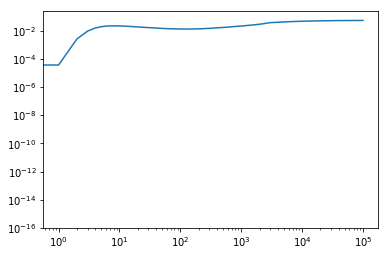

In [84]:
plt.loglog(z,(1+z)*Rbidm/H)

In [66]:
print(Th.keys())

dict_keys(['z', 'conf. time [Mpc]', 'x_e', "kappa' [Mpc^-1]", 'exp(-kappa)', 'g [Mpc^-1]', 'Tb [K]', 'Tbidm [K]', 'Rbidm', 'sigma_b_dm', 'c_b^2', 'tau_d'])


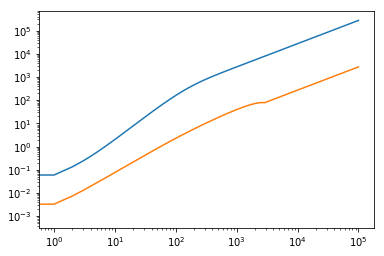

In [85]:
Tb = Th['Tb [K]']
Tdm = Th['Tbidm [K]']
plt.loglog(z,Tb)
plt.loglog(z,Tdm)

/home/markus/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
No handles with labels found to put in legend.


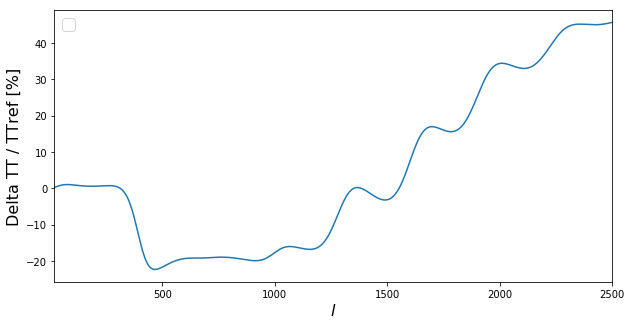

In [86]:
fig = plt.figure(1, figsize = (10,5))
ax = fig.add_subplot(111)
clref = cosmoref.lensed_cl(2500)
TTref = clref['tt']
cl = cosmo.lensed_cl(2500)
l = cl['ell']
TT = cl['tt']
ax.plot(l,100*(TT-TTref)/TTref)
ax.set_xlim(20,2.5e3)
ax.set_xlabel('$l$',fontsize=16)
ax.set_ylabel('Delta TT / TTref [%]',fontsize=16)
ax.legend(fontsize=16)